In [1]:
%load_ext autoreload
%autoreload 2

## Load dependencies

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from nnAudio import Spectrogram

import beatbrain
from beatbrain.utils.visualization import show_heatmap, show_audio, show_spec

## Visualize spectrogram for one audio sample

In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

### Load audio

In [4]:
audio, sr = librosa.load("../data/fma/wav/train/000/000002.wav")
audio_tensor = torch.tensor(audio, dtype=torch.float32, device=DEVICE)
show_audio(audio, rate=sr)

### Initialize Mel filter bank

In [5]:
audio_to_mel = Spectrogram.MelSpectrogram(n_fft=4096, hop_length=256, n_mels=512)
audio_to_mel.to(DEVICE)

STFT kernels created, time used = 0.3620 seconds
STFT filter created, time used = 0.0170 seconds
Mel filter created, time used = 0.0170 seconds


MelSpectrogram(
  Mel filter banks size = (512, 2049), trainable_mel=False
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=False)
)

### Convert audio to mel spectrogram and display

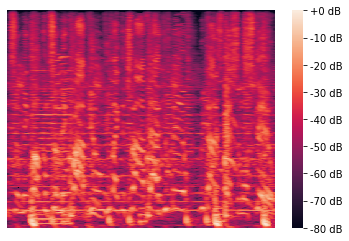

In [6]:
spec_tensor = audio_to_mel(audio_tensor[:(sr * 5) - 1])
spec = spec_tensor[0].cpu().numpy()
show_heatmap(spec)